In [187]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [196]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [197]:
# load the dataset and show first 10 records
data_set = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ANN/data/bank-additional-full.csv',sep=';')
data_set.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [198]:
# describe summary
data_set.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [199]:
data_set.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [200]:
data_set.shape

(41188, 21)

In [201]:
data_set.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [202]:
# extract numerical columns from the dataset
num_df = data_set.select_dtypes(include=np.number)
# remove the 'duration' column
num_df = num_df.drop('duration', axis=1)
# get the information about numerical columns
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [203]:
num_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


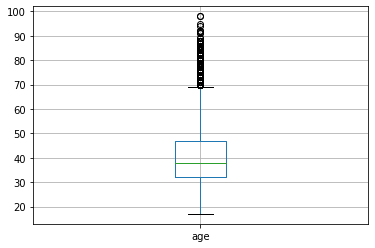

In [204]:
num_df.boxplot(column='age')

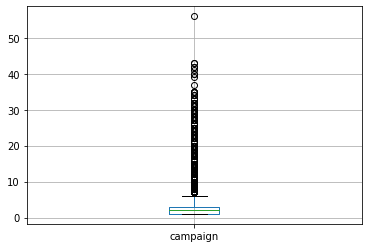

In [205]:
num_df.boxplot(column='campaign')

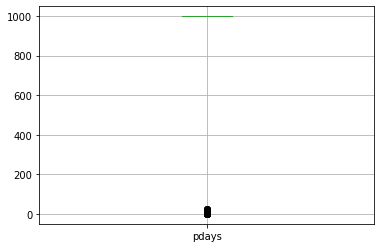

In [206]:
num_df.boxplot(column='pdays')

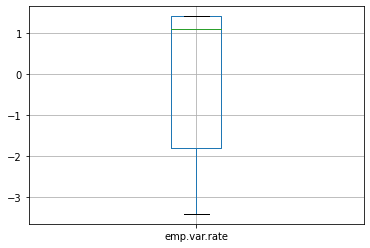

In [207]:
num_df.boxplot(column='emp.var.rate')

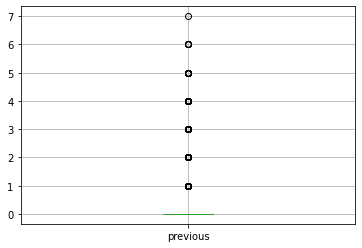

In [208]:
num_df.boxplot(column='previous')

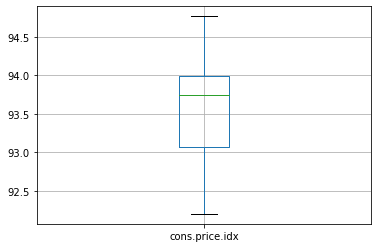

In [209]:
num_df.boxplot(column='cons.price.idx')

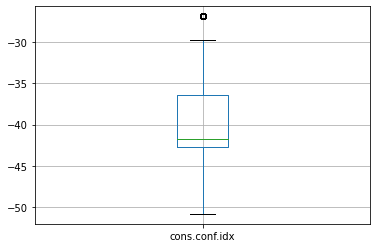

In [210]:
num_df.boxplot(column='cons.conf.idx')

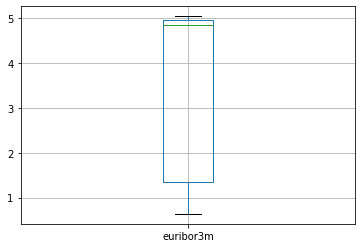

In [211]:
num_df.boxplot(column='euribor3m')

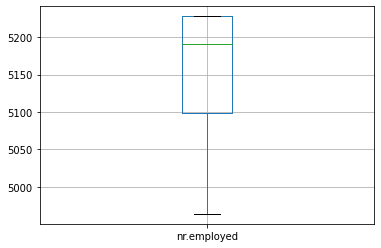

In [212]:
num_df.boxplot(column='nr.employed')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65923b8110>,
      dtype=object)

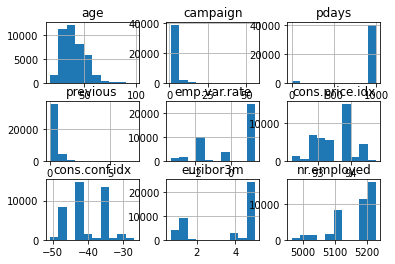

In [213]:
num_df.hist()

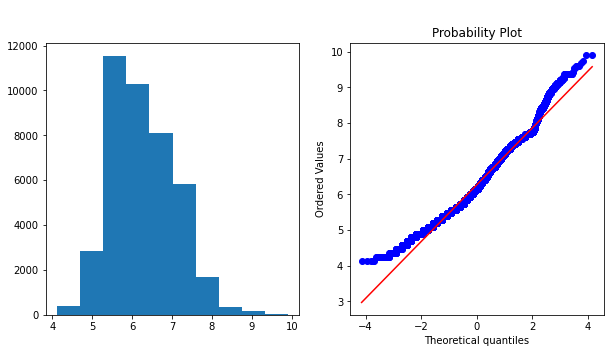

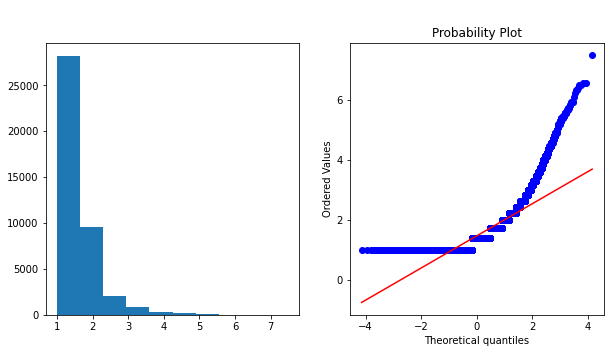

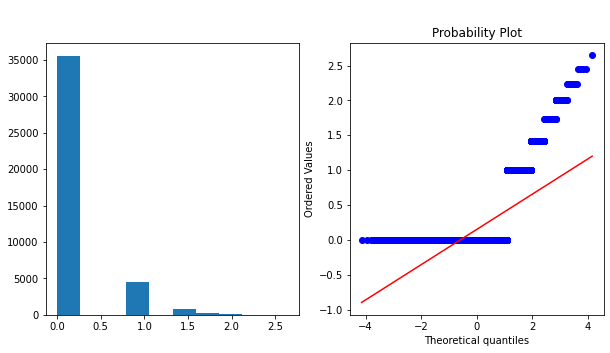

In [214]:
# transformations for right skewed features
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

columns = ['age', 'campaign', 'previous']
data = sqrt_transformer.transform(num_df[columns])
# code to get the histograms and Q-Q plots after applying transformations
for index, col in enumerate(columns):
    num_df[col] = data[:,index]
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='white')
    axes[0].hist(num_df[col])
    stats.probplot(num_df[col], dist="norm", plot=axes[1])
    plt.show()

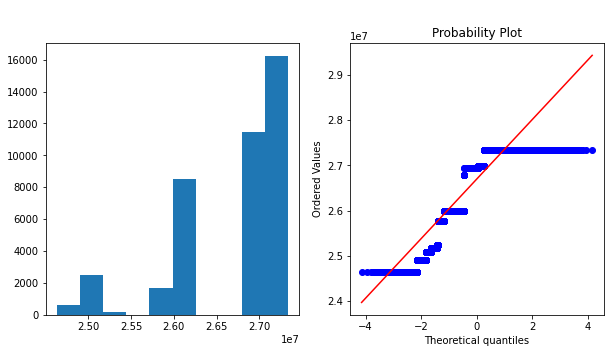

In [215]:
#transformations for left skewed features
squared_transformer = FunctionTransformer(lambda x: x**2, validate=True)

columns = ['nr.employed']
data = squared_transformer.transform(num_df[columns])
# code to get the histograms and Q-Q plots after applying transformations
for index, col in enumerate(columns):
    num_df[col] = data[:,index]
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='white')
    axes[0].hist(num_df[col])
    stats.probplot(num_df[col], dist="norm", plot=axes[1])
    plt.show()

In [216]:
#getting categorical columns separately 
categorical_df = data_set.select_dtypes(exclude=np.number)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [217]:
#one hot encoder to categorical features
categorical_cols = categorical_df.columns
categorical_cols = categorical_cols.drop('y')
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(categorical_df[categorical_cols])
coded_column_names = onehot_encoder.get_feature_names(categorical_cols)

onehot_encoder_df = pd.DataFrame(onehot_encoder.transform(categorical_df[categorical_cols]).toarray(),columns=coded_column_names)
categorical_df = categorical_df.join(onehot_encoder_df)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job                            41188 non-null  object 
 1   marital                        41188 non-null  object 
 2   education                      41188 non-null  object 
 3   default                        41188 non-null  object 
 4   housing                        41188 non-null  object 
 5   loan                           41188 non-null  object 
 6   contact                        41188 non-null  object 
 7   month                          41188 non-null  object 
 8   day_of_week                    41188 non-null  object 
 9   poutcome                       41188 non-null  object 
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

In [218]:
categorical_df.isnull().any()

job                     False
marital                 False
education               False
default                 False
housing                 False
                        ...  
day_of_week_tue         False
day_of_week_wed         False
poutcome_failure        False
poutcome_nonexistent    False
poutcome_success        False
Length: 64, dtype: bool

In [219]:
# drop the categorical columns from categorical_df dataframe
categorical_df.drop(categorical_cols, axis=1, inplace=True)
categorical_df.head(10)

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [220]:
categorical_df.isnull().any()

y                                False
job_admin.                       False
job_blue-collar                  False
job_entrepreneur                 False
job_housemaid                    False
job_management                   False
job_retired                      False
job_self-employed                False
job_services                     False
job_student                      False
job_technician                   False
job_unemployed                   False
job_unknown                      False
marital_divorced                 False
marital_married                  False
marital_single                   False
marital_unknown                  False
education_basic.4y               False
education_basic.6y               False
education_basic.9y               False
education_high.school            False
education_illiterate             False
education_professional.course    False
education_university.degree      False
education_unknown                False
default_no               

In [221]:
# final datadframe to join numerical data columns with categorical data columns
final_df = categorical_df.join(num_df)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   y                              41188 non-null  object 
 1   job_admin.                     41188 non-null  float64
 2   job_blue-collar                41188 non-null  float64
 3   job_entrepreneur               41188 non-null  float64
 4   job_housemaid                  41188 non-null  float64
 5   job_management                 41188 non-null  float64
 6   job_retired                    41188 non-null  float64
 7   job_self-employed              41188 non-null  float64
 8   job_services                   41188 non-null  float64
 9   job_student                    41188 non-null  float64
 10  job_technician                 41188 non-null  float64
 11  job_unemployed                 41188 non-null  float64
 12  job_unknown                    41188 non-null 

In [222]:
final_df.isnull().any()

y                   False
job_admin.          False
job_blue-collar     False
job_entrepreneur    False
job_housemaid       False
                    ...  
emp.var.rate        False
cons.price.idx      False
cons.conf.idx       False
euribor3m           False
nr.employed         False
Length: 63, dtype: bool

In [223]:
# droped 'y' column before apply the coding for categorical features
bank_df_features = final_df.drop('y',axis=1)
target = pd.DataFrame(final_df['y'], columns=["y"])
# apply the coding
target['y'] = target['y'].astype('category').cat.codes

In [224]:
bank_df_features.isnull().any()

job_admin.          False
job_blue-collar     False
job_entrepreneur    False
job_housemaid       False
job_management      False
                    ...  
emp.var.rate        False
cons.price.idx      False
cons.conf.idx       False
euribor3m           False
nr.employed         False
Length: 62, dtype: bool

In [225]:
target.value_counts()

y
0    36548
1     4640
dtype: int64

In [235]:
# split into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(bank_df_features, target, test_size = 0.2, random_state = 100)
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

In [236]:
Y_train.value_counts()

y
0    29213
1     3737
dtype: int64

In [238]:
#standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f659d6a4350>,
      dtype=object)

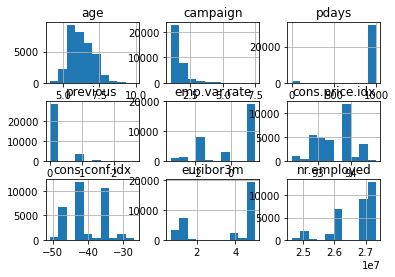

In [240]:
columnsto_scaled = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X_train[columnsto_scaled].hist()


,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
pdays,1.000000,-0.553141,0.273411,0.082837,-0.090080,0.298664,0.370790,-0.325500
previous,-0.553141,1.000000,-0.465287,-0.265987,-0.081412,-0.490698,-0.514798,0.221552
emp.var.rate,0.273411,-0.465287,1.000000,0.774387,0.200666,0.972175,0.908405,-0.304397
cons.price.idx,0.082837,-0.265987,0.774387,1.000000,0.064422,0.686706,0.522672,-0.140847
cons.conf.idx,-0.090080,-0.081412,0.200666,0.064422,1.000000,0.281674,0.106235,0.054015
euribor3m,0.298664,-0.490698,0.972175,0.686706,0.281674,1.000000,0.946288,-0.312671
nr.employed,0.370790,-0.514798,0.908405,0.522672,0.106235,0.946288,1.000000,-0.357620
y,-0.325500,0.221552,-0.304397,-0.140847,0.054015,-0.312671,-0.357620,1.000000


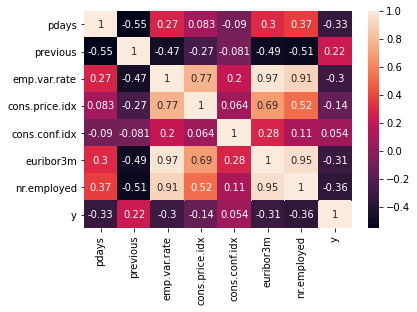

In [176]:
# correlation matrix
correlation_matrix = pd.concat([X_train.iloc[:,55:], Y_train], axis=1).corr()
sns.heatmap(correlation_matrix,annot=True)
correlation_matrix

In [229]:
#Performing PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()

X_Scaled_pca = pca.fit_transform(X_train) 

In [230]:
pca.explained_variance_ratio_

array([9.99999945e-01, 5.49837549e-08, 3.80472351e-11, 1.76311161e-12,
       1.43322625e-12, 8.82556915e-13, 7.85888772e-13, 6.77344232e-13,
       6.12435529e-13, 5.48570874e-13, 5.02375385e-13, 4.78567719e-13,
       4.62729631e-13, 4.24098040e-13, 4.06095581e-13, 3.88849200e-13,
       3.76684572e-13, 3.58307171e-13, 3.57038553e-13, 3.43449554e-13,
       2.63925387e-13, 2.40612722e-13, 2.29527636e-13, 2.08589856e-13,
       1.99394373e-13, 1.47593959e-13, 1.34065802e-13, 1.25001663e-13,
       1.20078441e-13, 1.19021395e-13, 9.82127372e-14, 8.55941814e-14,
       8.14845362e-14, 7.73244977e-14, 6.30557816e-14, 5.97112658e-14,
       4.79304827e-14, 4.36192051e-14, 3.45437252e-14, 3.38930734e-14,
       2.82721348e-14, 2.28175153e-14, 1.62925781e-14, 1.47011996e-14,
       8.93874715e-15, 8.36784902e-15, 5.88269460e-15, 4.88320717e-15,
       3.49468489e-15, 9.43790572e-16, 1.65355334e-16, 9.97823736e-33,
       9.97823736e-33, 9.97823736e-33, 9.97823736e-33, 9.97823736e-33,
      

In [177]:
pca = PCA(n_components=4)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [178]:
Y_train.value_counts()

y
0    29213
1     3737
dtype: int64

In [241]:
#Define and train an MLPClassifier named mlpcl on the given data
mlpcl = MLPClassifier(hidden_layer_sizes=(3,),
                      max_iter=500,
                      activation = 'relu', 
                      solver='adam', 
                      verbose=True,
                      early_stopping=True, 
                      validation_fraction=0.2, 
                      tol=0.01,
                      learning_rate_init=0.00001, random_state=466)
mlpcl.fit(X_train_pca, Y_train)

Iteration 1, loss = inf
Validation score: 0.714112
Iteration 2, loss = inf
Validation score: 0.714112
Iteration 3, loss = inf
Validation score: 0.714112
Iteration 4, loss = inf
Validation score: 0.714112
Iteration 5, loss = inf
Validation score: 0.714112
Iteration 6, loss = inf
Validation score: 0.714112
Iteration 7, loss = inf
Validation score: 0.714112
Iteration 8, loss = inf
Validation score: 0.714112
Iteration 9, loss = inf
Validation score: 0.714112
Iteration 10, loss = inf
Validation score: 0.714112
Iteration 11, loss = inf
Validation score: 0.714112
Iteration 12, loss = inf
Validation score: 0.714112
Validation score did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=1e-05, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=466, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.2, verbose=True,
              warm_start=False)

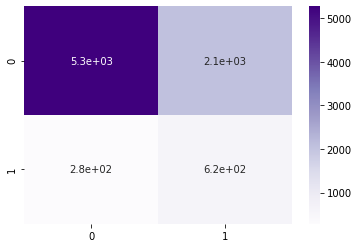

In [245]:
#confusion matrix
predictions = mlpcl.predict(X_test_pca)
cnf_matrix = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Purples, annot=True)
plt.show()

In [246]:
# print the training error and MSE
print("Training error: %f" % mlpcl.loss_curve_[-1])
print("Training set score: %f" % mlpcl.score(X_train_pca, Y_train))
print("Test set score: %f" % mlpcl.score(X_test_pca, Y_test))
print(accuracy_score(Y_test, predictions))

print("MSE: %f" % mean_squared_error(Y_test, predictions))

Training error: inf
Training set score: 0.720941
Test set score: 0.715829
0.7158290847293032
MSE: 0.284171


In [247]:
# determine the number of input features
n_features = X_train_pca.shape[1]

In [248]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [249]:
n_epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / n_epochs
momentum = 0.8
sgd = SGD(learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [250]:
# compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train_pca, Y_train, epochs=n_epochs, batch_size=32, verbose=0)

In [251]:
# evaluate the model
loss, acc = model.evaluate(X_test_pca, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.890
